<a href="https://colab.research.google.com/github/davypedro/Pandas-on-collab-in-the-Spark-to-Big-Data/blob/main/Pandas_on_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução ao Python

- Linguagem de Programação
- Linguagem de alto nível
- Linguagem interpretada

# O que é possível fazer com Python?

- Desenvolvimento Web
- Automação de tarefas
- Desenvolvimento de Apps
- Data Science


# Framework Spark


### Big Data: Como instalar o PySpark no Google Colab

Como instalar o PySpark no Google Colab é uma dúvida comum entre aqueles que estão migrando seus projetos de Data Science para ambientes na nuvem.

O termo Big Data está cada vez mais presente, e mesmo projetos pessoais podem assumir uma grande dimensionalidade devido à quantidade de dados disponíveis.

Para analisar grandes volumes de dados, Big Data, com velocidade, o Apache Spark é uma ferramenta muito utilizada, dada a sua capacidade de processamento de dados e computação paralela.

O Spark foi pensado para ser acessível, oferecendo diversas APIs e frameworks em Python, Scala, SQL e diversas outras linguagens.

### PySpark no Google Colab

PySpark é a interface alto nível que permite você conseguir acessar e usar o Spark por meio da linguagem Python. Usando o PySpark, você consegue escrever todo o seu código usando apenas o nosso estilo Python de escrever código.

Já o Google Colab é uma ferramenta incrível, poderosa e gratuita – com suporte de GPU inclusive. Uma vez que roda 100% na nuvem, você não tem a necessidade de instalar qualquer coisa na sua própria máquina.

No entanto, apesar da maioria das bibliotecas de Data Science estarem previamente instaladas no Colab, o mesmo não acontece com o PySpark. Para conseguir usar o PySpark é necessário alguns passos intermediários, que não são triviais para aqueles que estão começando.

Dessa maneira, preparei um tutorial simples e direto ensinando a instalar as dependências e a biblioteca.

### Instalando o PySpark no Google Colab

Instalar o PySpark não é um processo direto como de praxe em Python. Não basta usar um pip install apenas. Na verdade, antes de tudo é necessário instalar dependências como o Java 8, Apache Spark 2.3.2 junto com o Hadoop 2.7.

In [1]:
# instalar as dependências
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

A próxima etapa é configurar as variáveis de ambiente, pois isso habilita o ambiente do Colab a identificar corretamente onde as dependências estão rodando.

Para conseguir “manipular” o terminal e interagir como ele, você pode usar a biblioteca os.

In [2]:
# configurar as variáveis de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

# tornar o pyspark "importável"
import findspark
findspark.init('spark-2.4.4-bin-hadoop2.7')

Com tudo pronto, vamos rodar uma sessão local para testar se a instalação funcionou corretamente.

In [3]:
# iniciar uma sessão local e importar dados do Airbnb
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[*]').getOrCreate()

# Montar o google Drive no google Colab
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# carregar dados do Drive
df_spark = spark.read.csv('/content/drive/MyDrive/Bootcamp_Datascience/Mall_Customers.csv', inferSchema=True, header=True)

Mounted at /content/drive


In [4]:
# explorar uma prévia dos nossos dados através do spark
df_spark.head()

Row(CustomerID=1, Genre='Male', Age=19, Annual Income (k$)=15, Spending Score (1-100)=39)

## Big Data e Python

O PySpark permite que você crie seu servidor Apache Spark, trabalhar com grandes volumes de dados e até mesmo fazer streaming em tempo real.

In [5]:
df_spark.createOrReplaceTempView("mail_customers")

In [ ]:
df_spark.describe()

DataFrame[summary: string, CustomerID: string, Genre: string, Age: string, Annual Income (k$): string, Spending Score (1-100): string]

In [6]:
qry = """
SELECT * 
FROM mail_customers
"""

In [7]:
spark.sql(qry).show()

+----------+------+---+------------------+----------------------+
|CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|                    39|
|         2|  Male| 21|                15|                    81|
|         3|Female| 20|                16|                     6|
|         4|Female| 23|                16|                    77|
|         5|Female| 31|                17|                    40|
|         6|Female| 22|                17|                    76|
|         7|Female| 35|                18|                     6|
|         8|Female| 23|                18|                    94|
|         9|  Male| 64|                19|                     3|
|        10|Female| 30|                19|                    72|
|        11|  Male| 67|                19|                    14|
|        12|Female| 35|                19|                    99|
|        1

## SQL no Spark

In [8]:
qry = """
SELECT 
sum(cast(`Annual Income (k$)` as int)) AS sum_Annual_Income_kS,
COUNT(GENRE),
GENRE
FROM mail_customers
GROUP BY GENRE
"""

In [ ]:
spark.sql(qry).show()

+--------------------+------------+------+
|sum_Annual_Income_kS|count(GENRE)| GENRE|
+--------------------+------------+------+
|                6636|         112|Female|
|                5476|          88|  Male|
+--------------------+------------+------+



In [9]:
from pyspark.sql.functions import col, sum, count

df_spark.withColumn("Annual Income (k$)",col("Annual Income (k$)").cast("int"))\
        .groupBy("Genre").agg(sum("Annual Income (k$)"), count("genre")).show()

+------+-----------------------+------------+
| Genre|sum(Annual Income (k$))|count(genre)|
+------+-----------------------+------------+
|Female|                   6636|         112|
|  Male|                   5476|          88|
+------+-----------------------+------------+



# Operações com Pandas

Pandas é uma biblioteca open source, licenciada por BSD que provê estruturas de dados e ferramentas de análise de alta performance e fácil de ser utilizada para a linguagem de programação Python.

https://pandas.pydata.org/docs/index.html

In [10]:
import pandas
pandasdf = pandas.read_csv('/content/drive/MyDrive/Bootcamp_Datascience/Mall_Customers.csv', sep=",")

In [ ]:
pandasdf

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Framework Koalas

O projeto Koalas torna os cientistas de dados mais produtivos ao interagir com big data, implementando a API DataFrame do pandas no Apache Spark. Pandas é a implementação de DataFrame padrão de fato (nó único) em Python, enquanto Spark é o padrão de fato para processamento de big data. Com este pacote, você pode:

Seja imediatamente produtivo com o Spark, sem curva de aprendizado, se você já estiver familiarizado com os pandas.

Tenha uma única base de código que funcione tanto com pandas (testes, conjuntos de dados menores) quanto com Spark (conjuntos de dados distribuídos).

Adoraríamos que você experimentasse e nos desse feedback, por meio de nossas listas de discussão ou problemas do GitHub. Experimente o tutorial de 10 minutos do Koalas em um notebook Jupyter ao vivo aqui. O lançamento inicial pode levar vários minutos.

In [11]:
pip install koalas

     |████████████████████████████████| 390 kB 14.1 MB/s 


In [12]:
import databricks.koalas as pd
import numpy as np

In [13]:
# Exemplo de criação do dataframe koalas, que é muito semelhante ao pandas
pdk = pd.DataFrame(
    {'id': [1, 2, 3, 4, 5, 6],
     'name': ['Lúcia', ' Camila', 'Pedro', 'Lucas', 'José', 'João'],
     'occupation': ["Data Science",
                    "Data Analytics",
                    "Data Engineer",
                    "Database Engineer",
                    "Head Data Analytics",
                    "Business Intelligence"]},
    index=[10, 20, 30, 40, 50, 60])

In [14]:
# Exibindo resultado do dataframe
pdk

,id,name,occupation
10,1,Lúcia,Data Science
20,2,Camila,Data Analytics
30,3,Pedro,Data Engineer
40,4,Lucas,Database Engineer
50,5,José,Head Data Analytics
60,6,João,Business Intelligence


In [15]:
# O mesmo comando com a lib pandas foi compartilhado com o koalas
koalas_df = pd.read_csv('/content/drive/MyDrive/Bootcamp_Datascience/Mall_Customers.csv', sep=",")

In [16]:
#conhecendo os dados
koalas_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [17]:
#pegando apenas os 5 primeiros registros

koalas_df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
#retorna quantidade de linhas e colunas

koalas_df.shape

(200, 5)

In [19]:
#mostrando tipos de dados

koalas_df.info()

<class 'databricks.koalas.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int32 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int32 
 3   Annual Income (k$)      200 non-null    int32 
 4   Spending Score (1-100)  200 non-null    int32 
dtypes: int32(4), object(1)

In [20]:
# descrição dos dados

koalas_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.000000,28.000000,40.000000,34.000000
50%,100.000000,36.000000,61.000000,50.000000
75%,150.000000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
# exibindo se existem registros nulos nos nossos dados

koalas_df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [23]:
# contar dados específicos. Neste exemplo, estamos quantificando a o número 'x'
# de cada idade nesse dataset

koalas_df['Age'].value_counts()

32    11
35     9
19     8
31     8
49     7
30     7
40     6
23     6
27     6
38     6
47     6
36     6
34     5
50     5
48     5
29     5
21     5
20     5
59     4
67     4
28     4
54     4
24     4
18     4
39     3
45     3
46     3
25     3
43     3
37     3
22     3
60     3
68     3
33     3
53     2
57     2
44     2
65     2
26     2
51     2
63     2
70     2
41     2
58     2
52     2
42     2
66     2
64     1
55     1
69     1
56     1
Name: Age, dtype: int64

In [24]:
# Alterando nome de colunas usando Pandas do Koalas no Spark

koalas_df.columns = ['IdCliente',
                     'Genero',
                     'Idade',
                     'Renda Anual',
                     'Cota de Gastos']
koalas_df.head(5)

,IdCliente,Genero,Idade,Renda Anual,Cota de Gastos
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
# Outra forma de manipular nome de colunas quando o objetivo é substituir o espaço por subtraço.

koalas_df.columns = [espaco.replace(' ', '_')  for espaco in koalas_df.columns]

koalas_df.head(5)

,IdCliente,Genero,Idade,Renda_Anual,Cota_de_Gastos
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
#convertendo dataframa para tabela

koalas_df.to_table('df_koalas')

In [27]:
#Filtros usando Koalas do Pandas no Spark

qry = """
SELECT *
FROM df_koalas
WHERE Idade = '23'

"""

spark.sql(qry).show()

+---------+------+-----+-----------+--------------+
|IdCliente|Genero|Idade|Renda_Anual|Cota_de_Gastos|
+---------+------+-----+-----------+--------------+
|        4|Female|   23|         16|            77|
|        8|Female|   23|         18|            94|
|       30|Female|   23|         29|            87|
|       79|Female|   23|         54|            52|
|      101|Female|   23|         62|            41|
|      125|Female|   23|         70|            29|
+---------+------+-----+-----------+--------------+



In [28]:
koalas_df.loc[koalas_df["Idade"] == 23]


,IdCliente,Genero,Idade,Renda_Anual,Cota_de_Gastos
3,4,Female,23,16,77
7,8,Female,23,18,94
29,30,Female,23,29,87
78,79,Female,23,54,52
100,101,Female,23,62,41
124,125,Female,23,70,29


In [29]:
import plotly.express as px
fig = px.histogram(koalas_df["Idade"].to_numpy(), title="Histograma da Idade dos Compradores")
fig.show()

In [30]:
koalas_df.Genero.value_counts().sort_values().plot(kind = 'pie')

# Gráficos

Gráficos são importantes para notar outliers e o padrão dos dados antes mesmo de algum modelo matemático. Também são úteis para representar algum modelo já calculado de forma que seja mais fácil compreender.



## Matplotlib
Matplotlib é uma biblioteca  abrangente para a criação de visualizações estáticas, animadas, e interativas usando Python. Matplotlib torna fácil coisas fáceis e coisas difíceis possíveis.

* Criar plots a nivel de publicação.
* Gerar figuras interativas que suportam zoom, pan e atualização.
* Estilo visual e layout customizavel.
* Exportavel para vários formatos de arquivos.
* Incorporado no JupyterLab e em Interfáces Gráficas do Usuário.
* Usa um vasto leque de pacotes criados por terceiros construidos no Matplotlib

* https://matplotlib.org/



In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

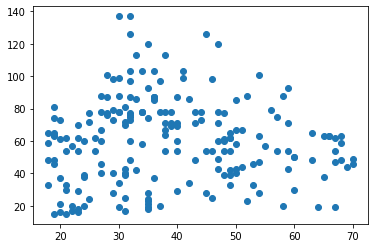

In [32]:
# Necessário colocar o comando to_numpy() quando for usar o koalas em relação ao
# código original do pandas. Código original abaixo para comparar:
# plt.scatter(pandasdf[pandasdf.columns[2]], pandasdf[pandasdf.columns[3]])
plt.scatter(koalas_df[koalas_df.columns[2]].to_numpy(), koalas_df[koalas_df.columns[3]].to_numpy())
plt.show()

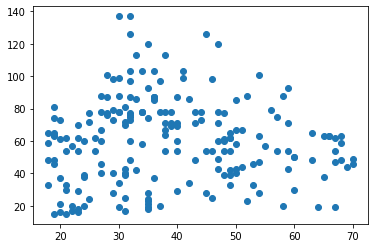

In [33]:
# Código do koalas também funciona se usarmos o dataset de pandas.
plt.scatter(pandasdf[pandasdf.columns[2]].to_numpy(), pandasdf[pandasdf.columns[3]].to_numpy())
plt.show()

## Plotly 
Biblioteca gráfica open source Plotly 
Gráficos e mapas interativos para Python, R, Julia, Javascript, ggplot2, F#, MATLAB®, e Dash.

* https://plotly.com/graphing-libraries/

In [34]:
import plotly

In [35]:
# x e y são objetos no formato de listas
# A vantagem do plotly express é que os gráficos são interativos
import plotly.express as px
fig = px.scatter(x=pandasdf[pandasdf.columns[2]].to_numpy(), y=pandasdf[pandasdf.columns[3]].to_numpy())
fig.show()

In [36]:
# Ou direto do dataframe
import plotly.express as px
fig = px.scatter(pandasdf, x="Age", y="Annual Income (k$)", color="Spending Score (1-100)", symbol="Genre")
fig.layout.legend.y = 1.05
fig.layout.legend.x = 1.035
fig.layout.coloraxis.colorbar.y = 0.40
fig.show()



# Links recomendados

- https://observablehq.com/ 
É um site semelhante ao Jupyter Notebook em que a linguagem principal é Javascript. Isso torna a realização do processo de dados mais ampla por todos os desenvolvedores da empresa.